# 傅里叶变换—不同图像模值相位叠加实验

In [1]:
# 导入必要库
import matplotlib.pyplot as plt
import cv2
import numpy as np
from scipy import interpolate
%matplotlib inline
np.set_printoptions(suppress=True, threshold=np.nan)

## 读取两幅图片

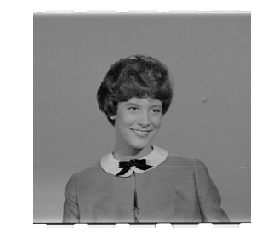

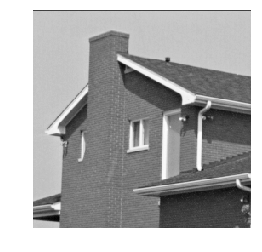

In [2]:
#img = cv2.imread('.\\data\\5.3.01.tiff',0)
img2 = cv2.imread('.\\data\\4.1.05.tiff')
img2= cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

#img = cv2.imread('.\\data\\5.3.01.tiff',0)
img1 = cv2.imread('.\\data\\4.1.03.tiff')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)

plt.imshow(img1,cmap = 'gray')
plt.axis("off")#去除坐标轴
plt.show()

plt.imshow(img2,cmap = 'gray')
plt.axis("off")#去除坐标轴
plt.show()

## 求出第一幅图片模值

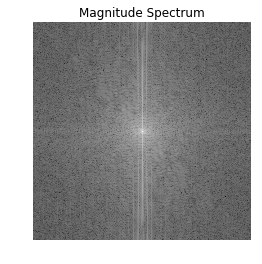

In [3]:
f1 = np.fft.fft2(img1)
fshift1 = np.fft.fftshift(f1)
magnitude_spectrum = np.log(np.abs(fshift1))
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum')
plt.axis("off")#去除坐标轴
plt.show()

## 求出第二幅图片相位

C:\Users\kami\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\kami\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


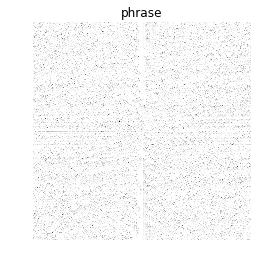

In [4]:
f2 = np.fft.fft2(img2)
fshift2 = np.fft.fftshift(f2)
ph2=np.log(np.angle(fshift2)*180/np.pi)


plt.imshow(ph2, cmap = 'gray')
plt.title('phrase')
plt.axis("off")#去除坐标轴
plt.show()

## 将图一的幅值和图二的相位进行叠加

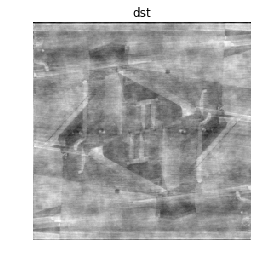

In [5]:
f1 = np.fft.fft2(img1)
magnitude_spectrum = np.abs(f1)


f2 = np.fft.fft2(img2)
ph2=np.angle(f2)


m1_f2 = magnitude_spectrum * np.cos(ph2)
m1_f2 =m1_f2 + magnitude_spectrum * np.sin(ph2)

img_back = np.fft.ifft2(m1_f2)#使用FFT逆变换，此时结果仍然是复数
img_back = np.abs(img_back)#还原成JET图像，变成可以看的图像

plt.imshow(img_back,cmap='gray')
plt.title('dst')
plt.axis("off")#去除坐标轴
plt.show()


## 集中展示

(Text(0.5, 1.0, 'dst'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

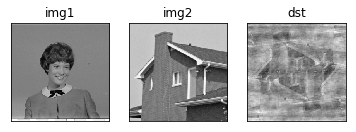

In [6]:
plt.subplot(131),plt.imshow(img1, cmap = 'gray')
plt.title('img1'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img2, cmap = 'gray')
plt.title('img2'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back,cmap = 'gray')
plt.title('dst'), plt.xticks([]), plt.yticks([])